In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1000000000, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Commodities', min_assets=200000000), 75, 21)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-22 to 2019-07-05 - 21


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

10


,len,mean,std,shrp,drawdown
Symbols,,,,,
GLD,32,4.668413,3.441557,1.308055,2.667662
BAR,32,4.669267,3.451754,1.304438,2.700990
SGOL,32,4.685466,3.465798,1.303826,2.692057
IAU,32,4.676491,3.504588,1.286834,2.716592
DBA,32,2.773809,2.656083,0.981574,5.928617
GLTR,32,3.530215,4.059945,0.828471,3.584793
PALL,32,6.393535,8.711188,0.714813,11.245765
PSLV,32,3.206193,4.807412,0.632258,4.805911
SIVR,32,1.315764,3.300424,0.348167,4.517453


evicted PALL 0.8346950088745034
retry backlogs ['GLTR', 'IAU', 'SGOL', 'BAR', 'SIVR', 'SLV', 'PSLV'] at 0.96
retry backlogs ['IAU', 'SGOL', 'BAR', 'SIVR', 'SLV', 'PSLV', 'GLTR'] at 0.97
retry backlogs ['IAU', 'SGOL', 'BAR', 'SIVR', 'SLV', 'PSLV', 'GLTR'] at 0.98
retry backlogs ['IAU', 'SGOL', 'BAR', 'SIVR', 'SLV', 'PSLV', 'GLTR'] at 0.99
evicted SLV 0.984877523694228
evicted PSLV 0.9851117286596296
evicted GLTR 0.9804327272196267
retry backlogs ['IAU', 'SGOL', 'BAR', 'SIVR'] at 1.0
evicted IAU 0.9998643152550487
evicted SGOL 0.999926697050518
evicted BAR 0.9997332827497829
evicted SIVR 0.9654721684532972
{'DBA': 0.5, 'GLD': 0.5}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,32.0,3.721605,2.105995,-0.972097,2.860773,4.359582,4.945136,6.850901,1.688009,2.403009
GLD,32.0,4.668413,3.441557,-0.444921,2.540404,3.973749,6.669591,10.634784,1.308055,2.667662
DBA,32.0,2.773809,2.656083,-1.935884,0.849485,2.978608,5.022087,7.717040,0.981574,5.928617


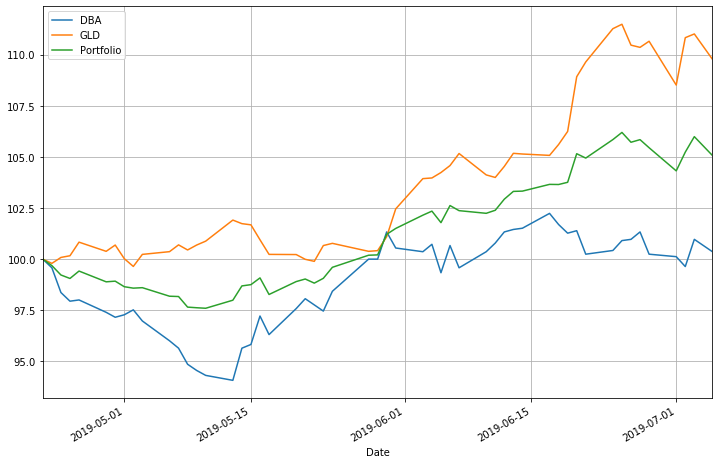

In [4]:
quote.setup_mask(stats.index)
ratio = quote.optimize_portfolio()
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)